In [22]:
import numpy as np 
import pandas as pd 
import re

import numpy as np 
import requests
from PIL import Image
from io import BytesIO 

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/schopenhauer-work-corpus/Schopenhauer_works_corpus.csv


In [23]:
df = pd.read_csv('/kaggle/input/schopenhauer-work-corpus/Schopenhauer_works_corpus.csv')
df

,Unnamed: 0,book_title,publishing_date,text,text_clean
0,0,The Art of Literature,1890,"ON AUTHORSHIP.\r\n\r\n\r\nThere are, first of ...",authorship are first all two kinds authors wri...
1,1,The Art of Controversy,1831,THE ART OF CONTROVERSY.\r\n\r\n\r\nPRELIMINARY...,art controversy preliminary logic dialectic an...
2,2,Counsels and Maxims,1851,INTRODUCTION.\r\n\r\nIf my object in these pag...,introduction object pages present complete sch...
3,3,Studies in Pessimism,1851,ON THE SUFFERINGS OF THE WORLD.\r\n\r\n\r\nUnl...,sufferings world unless _suffering_ direct imm...
4,4,On Human Nature,1851,HUMAN NATURE.\r\n\r\n\r\nTruths of the physica...,human nature truths physical order may possess...
5,5,On the Wisdom of Life,1851,INTRODUCTION.\r\n\r\n\r\nIn these pages I shal...,introduction pages shall speak _the wisdom lif...
6,6,"Religion, A dialogue",1851,RELIGION.\r\n\r\nA DIALOGUE.\r\n\r\n\r\n_Demop...,religion dialogue _demopheles_ ourselves dear ...
7,7,Essays,1851,ESSAYS OF SCHOPENHAUER.\r\n\r\n\r\n\r\n\r\nON ...,essays schopenhauer authorship style are first...
8,8,The World As Will And Idea (Vol. 1 of 3),1819,PREFACE TO THE FIRST EDITION.\r\n\r\n\r\nI pro...,preface first edition propose point book must ...
9,9,The World As Will And Idea (Vol. 2 of 3),1844,APPENDIX: CRITICISM OF THE KANTIAN PHILOSOPHY....,appendix criticism kantian philosophy cest le ...


<AxesSubplot:>

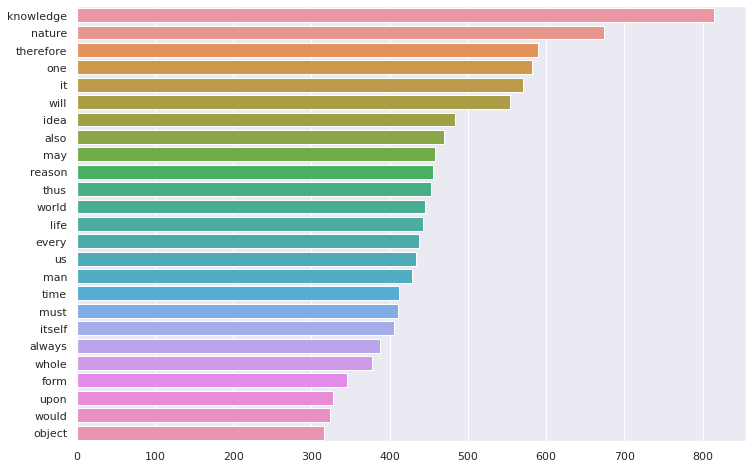

In [24]:
# Isolate the book wanted: Beyond Good and Evil
will = df[df['book_title']=='The World As Will And Idea (Vol. 1 of 3)']['text_clean'][8]
tokens = word_tokenize(will)
freq = Counter(tokens)
sorted_freq = dict(sorted(freq.items(), key=lambda x: x[1], reverse=True))
top_25_words = list(sorted_freq.keys())[:25]
top_25_freq = list(sorted_freq.values())[:25]
sns.barplot(y=top_25_words, x=top_25_freq)

# Wordcloud

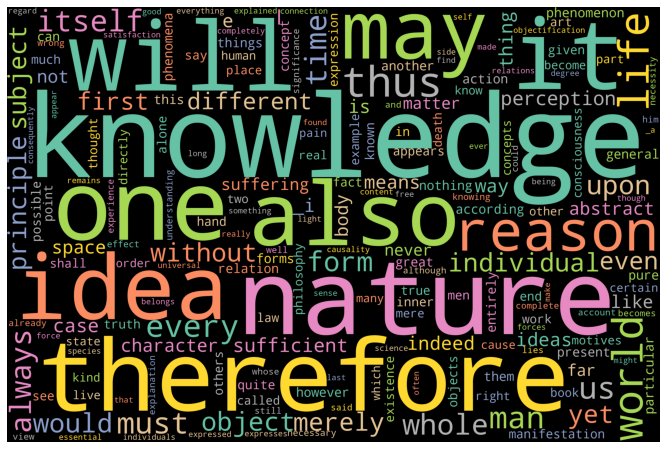

In [25]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(12, 8))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='black', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS)
wordcloud.generate_from_frequencies(sorted_freq)
plot_cloud(wordcloud)

# Text Summarization

In [68]:
will = df[df['book_title']=='The World As Will And Idea (Vol. 1 of 3)']['text'][8]
will = will.encode(encoding="ascii", errors="ignore").decode()
will = re.sub("[\r\n]", " ", will)

In [71]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
import re

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
from nltk.tokenize import sent_tokenize
sentences = []
text = will.split(". ")
for s in text:
    sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x] # flatten list

['PREFACE TO THE FIRST EDITION',
 '     I propose to point out here how this book must be read in order to be  thoroughly understood',
 'By means of it I only intend to impart a single  thought']

In [77]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2021-06-14 14:40:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-14 14:40:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-14 14:40:15--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [78]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [79]:
len(word_embeddings)

400000

In [80]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [83]:
# function to remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [84]:
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

In [86]:
# from sklearn.metrics.pairwise import cosine_similarity
# sim_mat = np.zeros([len(sentences), len(sentences)])
# for i in range(len(sentences)):
#     for j in range(len(sentences)):
#         if i != j:
#             sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), 
#                                               sentence_vectors[j].reshape(1,100))[0,0]

In [ ]:
# import networkx as nx

# nx_graph = nx.from_numpy_array(sim_mat)
# scores = nx.pagerank(nx_graph)